# Análise motores 150 e 190

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from SEC_ANALYSIS import *

In [2]:
#Carregando dataset
reg = pd.read_excel('Data_Set_Regressao_6.xlsx')

In [3]:
reg.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2021-03-01 00:00:00.112,145.988844,150.112594,149.588070,151.333223,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-01 00:00:01.348,145.333596,149.602304,150.737152,151.297747,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-01 00:00:02.049,145.241375,149.558651,150.464358,150.783715,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-01 00:00:03.349,145.937183,150.032650,149.646428,152.027451,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-01 00:00:04.029,145.900268,149.697587,150.371697,151.034176,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
reg.drop(['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], axis=1, inplace=True) 

In [27]:
reg.tail()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
5173,2021-03-10 04:38:37.966,183.608402,188.708229,191.361884,191.278107,8,0,190,E,5
5174,2021-03-10 04:38:39.260,183.163249,188.388229,189.453394,186.615889,8,0,190,E,5
5175,2021-03-10 04:38:40.018,185.444352,187.568599,190.225367,190.044304,8,0,190,E,5
5176,2021-03-10 04:38:40.891,182.766203,187.360502,184.377795,190.178814,8,0,190,E,5
5177,2021-03-10 04:38:41.964,16.582312,0.000000,1374.318553,12.292699,8,1,190,E,5


In [5]:
print(" Este arquivo contém {0} linhas e {1} colunas.".format(reg.shape[0], reg.shape[1]))

 Este arquivo contém 5178 linhas e 16 colunas.


In [6]:
print(" Este arquivo contém {0} linhas duplicadas.".format(sum(reg.duplicated())))

 Este arquivo contém 0 linhas duplicadas.


In [7]:
reg.describe()

,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Soma,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
count,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,173.442596,178.713889,180.707854,179.885000,5.918115,0.000966,179.586713,3.698339,NaN,NaN,NaN,NaN,NaN,NaN
std,23.992002,24.346317,37.553915,17.950154,2.582062,0.031062,17.554328,2.194291,NaN,NaN,NaN,NaN,NaN,NaN
min,0.736617,0.000000,0.000008,0.000000,1.000000,0.000000,150.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,146.434368,150.574449,151.114427,152.003862,3.000000,0.000000,150.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,182.298890,188.195512,189.714842,189.635880,8.000000,0.000000,190.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,183.661435,189.212667,190.803538,190.665894,8.000000,0.000000,190.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1374.323603,1370.342938,1374.318553,200.294893,8.000000,1.000000,190.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
reg.isnull().sum()

BasicVariables/SEC_Velocidade_P2_PV_Timestamp       0
BasicVariables/SEC_Velocidade_P2_PV                 0
BasicVariables/SEC_Velocidade_P3_PV                 0
BasicVariables/SEC_Velocidade_P4_PV                 0
BasicVariables/SEC_Velocidade_P5_PV                 0
Set                                                 0
Falha                                               0
Set_Point                                           0
Cor                                                 0
Soma                                                0
Unnamed: 10                                      5178
Unnamed: 11                                      5178
Unnamed: 12                                      5178
Unnamed: 13                                      5178
Unnamed: 14                                      5178
Unnamed: 15                                      5178
dtype: int64

In [9]:
#Criando cópia do dataframe principal
reg2 = reg.copy()

In [10]:
reg2.shape[0]

5178

In [11]:
reg2.dtypes

BasicVariables/SEC_Velocidade_P2_PV_Timestamp    datetime64[ns]
BasicVariables/SEC_Velocidade_P2_PV                     float64
BasicVariables/SEC_Velocidade_P3_PV                     float64
BasicVariables/SEC_Velocidade_P4_PV                     float64
BasicVariables/SEC_Velocidade_P5_PV                     float64
Set                                                       int64
Falha                                                     int64
Set_Point                                                 int64
Cor                                                      object
Soma                                                      int64
Unnamed: 10                                             float64
Unnamed: 11                                             float64
Unnamed: 12                                             float64
Unnamed: 13                                             float64
Unnamed: 14                                             float64
Unnamed: 15                             

# Parte 2: Regressão Linear Múltipla

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

In [13]:
y = reg2['Falha']

features = ['BasicVariables/SEC_Velocidade_P2_PV',
            'BasicVariables/SEC_Velocidade_P3_PV','BasicVariables/SEC_Velocidade_P4_PV', 
            'BasicVariables/SEC_Velocidade_P5_PV','Set_Point']

colors = {'D':'black', 'E':'blue'}

X = reg2[features]
print(X)
print(y)
print('****')
#XX = np.array(X)
#yy = np.array(y)
#XX.reshape(1,-1)
#print(XX)
#print(yy)
#train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state=1)

model = LinearRegression().fit(X,y)

print('coefficient of determination:', model.score(X,y))
print('intercept:', model.intercept_)
print('slope:', model.coef_)

      BasicVariables/SEC_Velocidade_P2_PV  \
0                              145.988844   
1                              145.333596   
2                              145.241375   
3                              145.937183   
4                              145.900268   
...                                   ...   
5173                           183.608402   
5174                           183.163249   
5175                           185.444352   
5176                           182.766203   
5177                            16.582312   

      BasicVariables/SEC_Velocidade_P3_PV  \
0                              150.112594   
1                              149.602304   
2                              149.558651   
3                              150.032650   
4                              149.697587   
...                                   ...   
5173                           188.708229   
5174                           188.388229   
5175                           187.568599   
5176     

<ipython-input-14-a24c0d50be07>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


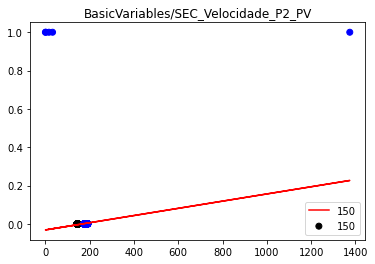

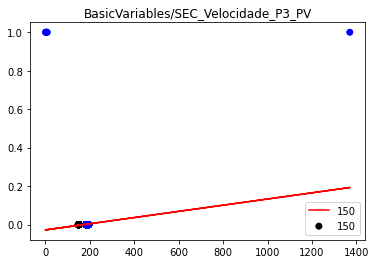

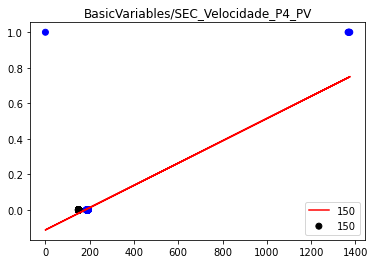

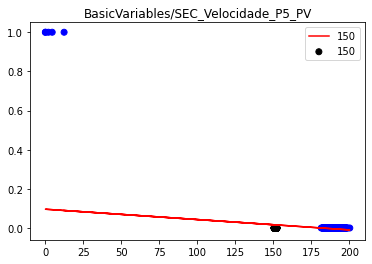

In [14]:
for variable in ['BasicVariables/SEC_Velocidade_P2_PV','BasicVariables/SEC_Velocidade_P3_PV',
                 'BasicVariables/SEC_Velocidade_P4_PV', 
                 'BasicVariables/SEC_Velocidade_P5_PV']:
    x = reg2[variable].values
    fig, ax = plt.subplots()
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    plt.title(variable)
    ax.scatter(x, y, c=reg2['Cor'].apply(lambda w: colors[w]),cmap=colors)
    plt.legend(labels=reg2['Set_Point'])
fig.show()

# Parte 3: Regressão Logística

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

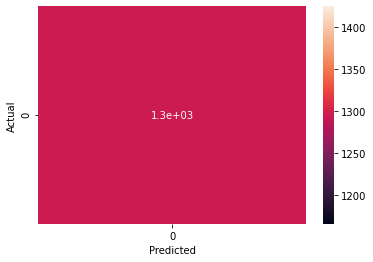

In [17]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [18]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  1.0


In [19]:
print (X_test) #test dataset
print (y_pred) #predicted values

      BasicVariables/SEC_Velocidade_P2_PV  \
1246                           146.095821   
499                            144.973261   
4252                           183.040635   
3297                           183.796142   
1691                           183.313490   
...                                   ...   
1031                           145.277368   
3568                           182.764646   
4978                           182.843781   
2718                           180.506337   
3870                           181.237821   

      BasicVariables/SEC_Velocidade_P3_PV  \
1246                           149.335644   
499                            150.297057   
4252                           190.154158   
3297                           188.911247   
1691                           191.130604   
...                                   ...   
1031                           150.348544   
3568                           189.120840   
4978                           187.634811   
2718     

In [20]:
DataSetTrain = pd.read_excel('Data_Set_Regressao_Train.xlsx')
DataSetTest  = pd.read_excel('Data_Set_Regressao_Test.xlsx')

In [21]:
y_train = DataSetTrain ['Falha']
features_train = ['BasicVariables/SEC_Velocidade_P2_PV',
            'BasicVariables/SEC_Velocidade_P3_PV','BasicVariables/SEC_Velocidade_P4_PV', 
            'BasicVariables/SEC_Velocidade_P5_PV']

x_train = DataSetTrain[features_train]

y_test = DataSetTest ['Falha']
features_test = ['BasicVariables/SEC_Velocidade_P2_PV',
            'BasicVariables/SEC_Velocidade_P3_PV','BasicVariables/SEC_Velocidade_P4_PV', 
            'BasicVariables/SEC_Velocidade_P5_PV']

x_test = DataSetTest[features_test]

logistic_regression= LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

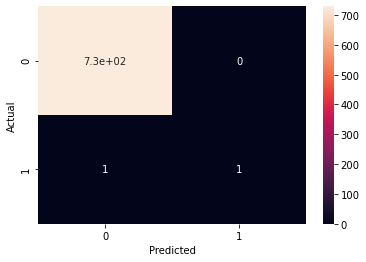

In [22]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [23]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9986320109439124


In [24]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [25]:
print(y_test)

0      0
1      0
2      0
3      0
4      0
      ..
726    0
727    0
728    0
729    1
730    1
Name: Falha, Length: 731, dtype: int64
